In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r"C:\\Users\\Dell\\Downloads\\drugsComTrain_raw.csv (1)\\drugsComTrain_raw.csv")

In [40]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [41]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [42]:
df.describe(include=[np.number])

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [61]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   uniqueID             161297 non-null  int64         
 1   drugName             161297 non-null  object        
 2   condition            160398 non-null  object        
 3   review               161297 non-null  object        
 4   rating               161297 non-null  int64         
 5   date                 161297 non-null  datetime64[ns]
 6   usefulCount          161297 non-null  int64         
 7   day                  161297 non-null  int64         
 8   year                 161297 non-null  int64         
 9   month                161297 non-null  int64         
 10  review_length        161297 non-null  int64         
 11  z_score_rating       161297 non-null  float64       
 12  z_score_usefulCount  161297 non-null  float64       
dtypes: datetime64[

In [43]:
df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79


In [46]:
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


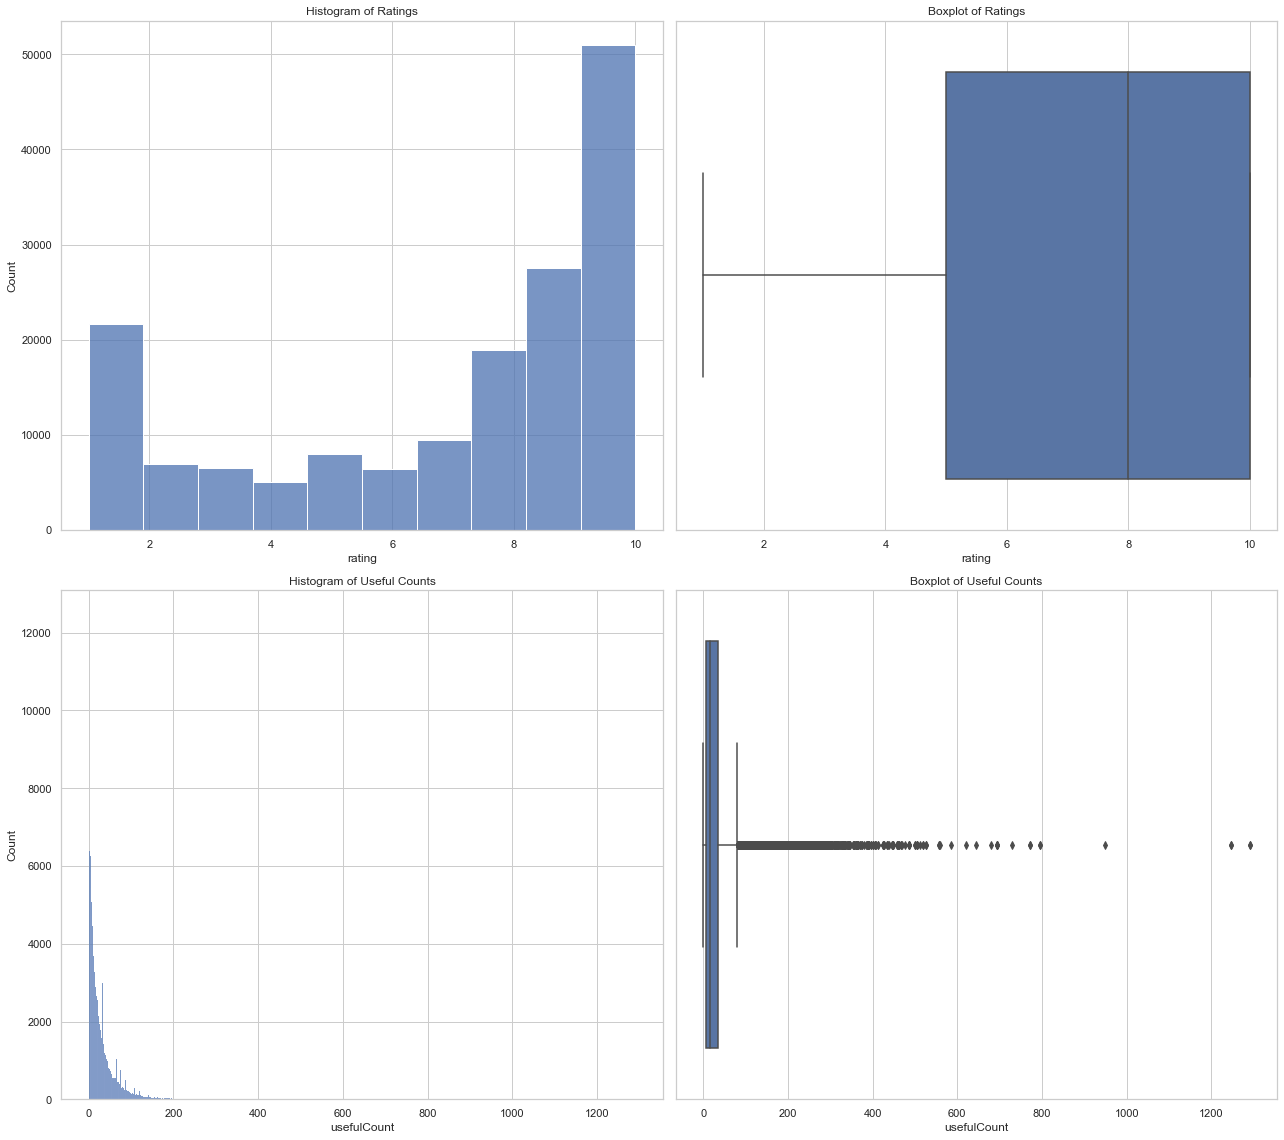

In [47]:
plt.figure(figsize=(18, 16))

# Histogram and boxplot for rating
plt.subplot(2, 2, 1)
sns.histplot(df['rating'], kde=False, bins=10)
plt.title('Histogram of Ratings')

plt.subplot(2, 2, 2)
sns.boxplot(df['rating'])
plt.title('Boxplot of Ratings')

# Histogram and boxplot for usefulCount
plt.subplot(2, 2, 3)
sns.histplot(df['usefulCount'], kde=False)
plt.title('Histogram of Useful Counts')

plt.subplot(2, 2, 4)
sns.boxplot(df['usefulCount'])
plt.title('Boxplot of Useful Counts')

plt.tight_layout()
plt.show()


The rating column has a bimodal distribution. There are peaks at the lower and upper ends of the ratings, indicating that many users either rate drugs very highly (around 10) or very poorly (around 1).

From the Histogram:
The rating column has a bimodal distribution. There are peaks at the lower and upper ends of the ratings, indicating that many users either rate drugs very highly (around 10) or very poorly (around 1).
The usefulCount column is heavily skewed to the right, indicating that most of the reviews are found useful by a small number of people. However, there are some reviews which have been found useful by a large number of people.

From the boxplots:

For rating, the box is fairly symmetrical around the median (8), indicating that the data is not skewed. However, as observed from the histogram, the data is not normally distributed.
For usefulCount, there are many outliers on the upper end, which aligns with the right skew observed in the histogram.

##### The bar plots for the top drugs and conditions.

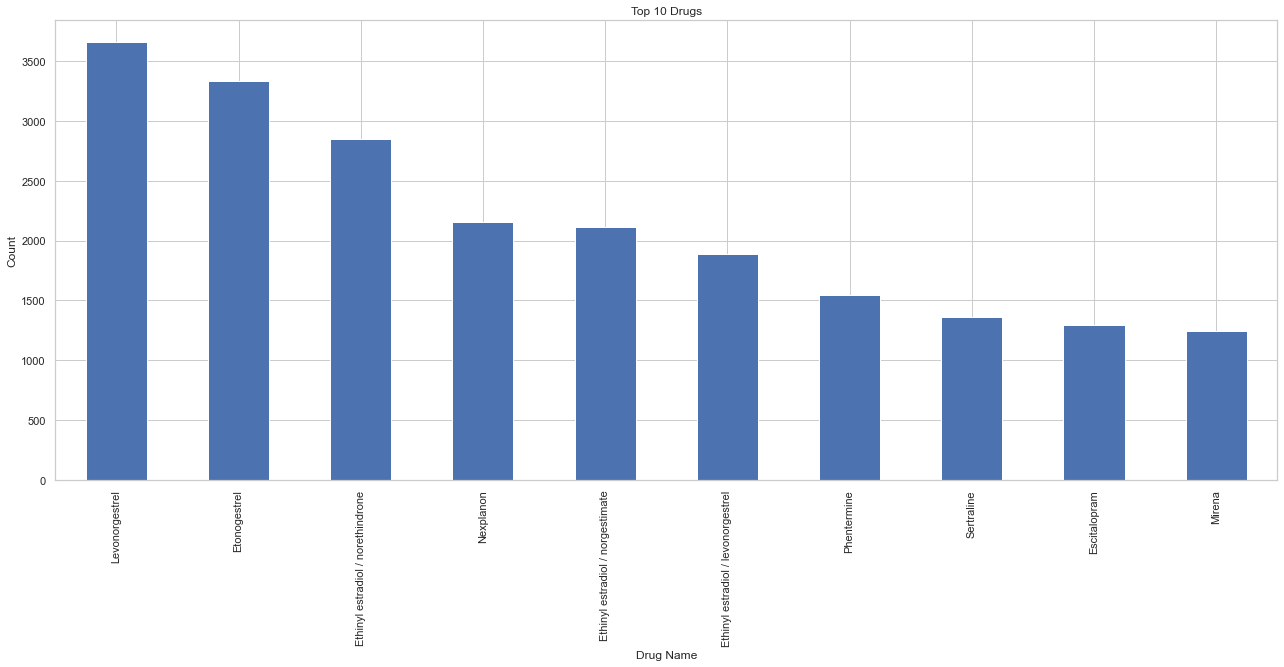

In [48]:
plt.figure(figsize=(18, 16))

# Top 10 drugs
plt.subplot(2, 1, 1)
df['drugName'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


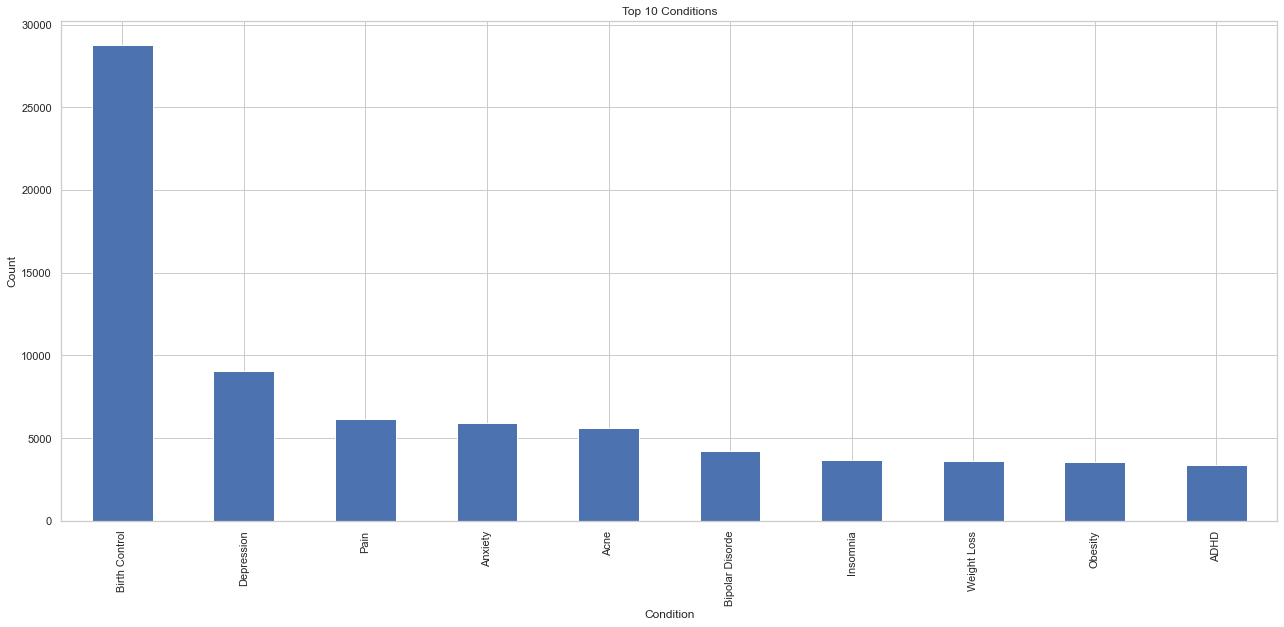

In [49]:
plt.figure(figsize=(18, 16))

# Top 10 conditions
plt.subplot(2, 1, 2)
df['condition'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


 ##### 'Birth Control', 'Depression', and 'Pain' are the conditions for which drugs are most frequently reviewed. This could suggest that drugs for these conditions are more commonly used, or that users are more inclined to review these drugs.

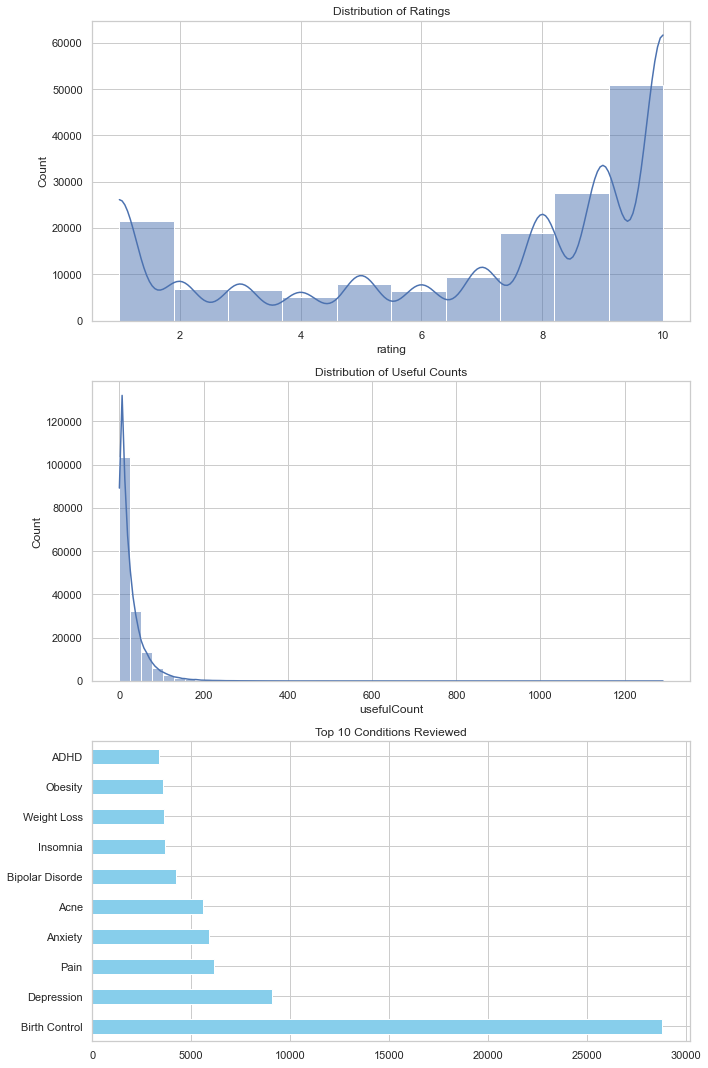

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style of the plots
sns.set(style="whitegrid")

# Create a figure instance
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Distribution of 'rating'
sns.histplot(df['rating'], bins=10, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Ratings')

# Distribution of 'usefulCount'
sns.histplot(df['usefulCount'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Useful Counts')

# Top 10 conditions reviewed
df['condition'].value_counts()[:10].plot(kind='barh', ax=axes[2], color='skyblue')
axes[2].set_title('Top 10 Conditions Reviewed')

# Show the plots
plt.tight_layout()
plt.show()


Distribution of Ratings: The distribution of ratings is skewed to the left, with many reviews having a rating of 10. There is also a significant number of reviews with a rating of 1. This indicates a polarized opinion on the drugs, with many users either very satisfied or very unsatisfied.

Distribution of Useful Counts: The distribution of useful counts is heavily skewed to the right. Most of the reviews are considered useful by less than 100 people, but there are a few reviews that are considered useful by a large number of people (more than 500).

Top 10 Conditions Reviewed: The most frequently reviewed conditions are Birth Control, Depression, Pain, and Anxiety. This is not surprising, as these are common conditions for which medication is often prescribed.

The maximum value in the usefulCount field has been reduced from 1,291 to 81, which confirms that the capping was successful.

In [51]:
df['review_length'] = df['review'].apply(len)

In [52]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,day,year,month,review_length
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,20,2012,5,79
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,27,2010,4,741
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,14,2009,12,755
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,3,2015,11,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,27,2016,11,719
...,...,...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125,31,2015,5,689
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34,1,2011,11,262
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35,15,2014,3,95
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79,19,2015,9,772


In [53]:
# # Fill missing values in condition with 'Unknown'
# df['condition'].fillna('Unknown', inplace=True)

In [54]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split

# # Features and target
# features = df[['uniqueID', 'drugName', 'condition', 'rating', 'usefulCount', 'year', 'month', 'review_length']]
# target = df['review']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# X_train.shape, X_test.shape


In [55]:
from scipy import stats
import numpy as np

# Calculate the Z-scores for 'rating' and 'usefulCount'
df['z_score_rating'] = np.abs(stats.zscore(df['rating']))
df['z_score_usefulCount'] = np.abs(stats.zscore(df['usefulCount']))

# Define a threshold for outliers
threshold = 3

# Detect outliers
outliers_rating = df[df['z_score_rating'] > threshold]
outliers_usefulCount = df[df['z_score_usefulCount'] > threshold]

# Number of outliers detected
num_outliers_rating = outliers_rating.shape[0]
num_outliers_usefulCount = outliers_usefulCount.shape[0]

num_outliers_rating, num_outliers_usefulCount



(0, 2905)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


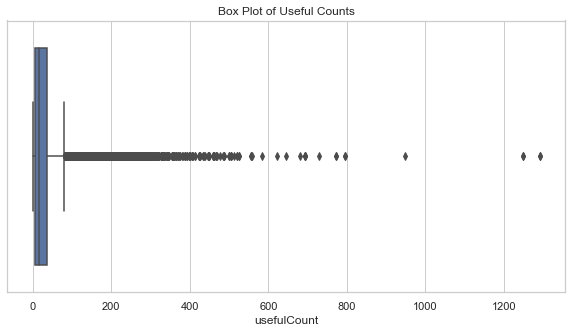

In [56]:
# Create a figure instance
fig, ax = plt.subplots(figsize=(10, 5))

# Box plot of 'usefulCount'
sns.boxplot(df['usefulCount'], ax=ax)
ax.set_title('Box Plot of Useful Counts')

# Show the plot
plt.show()


In [57]:
# Remove the outliers
df_clean = df[(df['z_score_usefulCount'] <= threshold)]

# Drop the Z-score columns
df_clean = df_clean.drop(columns=['z_score_rating', 'z_score_usefulCount'])

# Check the new shape of the dataframe
df_clean.shape


(158392, 11)

Review Length: The length of a review could potentially be a useful feature. For instance, longer reviews might be more detailed and therefore have a different impact on the rating than shorter reviews.

Review Sentiment: The sentiment of a review (i.e., whether it's positive, negative, or neutral) could also be a useful feature. We can use a simple sentiment analysis tool to extract this feature from the review text.

Year and Month: The date when the review was posted might also be a useful feature, as there could be trends or patterns over time. We can extract the year and month from the 'date' column.

In [58]:
from textblob import TextBlob

# Create 'review_length' feature
df_clean['review_length'] = df_clean['review'].apply(len)

# Create 'review_sentiment' feature
df_clean['review_sentiment'] = df_clean['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert 'date' to datetime format
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Create 'year' and 'month' features
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month

# Display the first few rows of the dataframe
df_clean.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount,day,year,month,review_length,review_sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,20,2012,5,79,0.000000
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,14,2009,12,755,0.067210
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,3,2015,11,448,0.179545
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,27,2016,11,719,0.194444
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,28,2015,11,403,0.003472


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the features and the target
features = df_clean[['review_length', 'review_sentiment', 'year', 'month', 'usefulCount']]
target = df_clean['rating']

# Define the preprocessing steps
numeric_features = ['review_length', 'year', 'month', 'usefulCount']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['review_sentiment']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the features
features_preprocessed = preprocessor.fit_transform(features)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features_preprocessed, target, test_size=0.2, stratify=target, random_state=42)

X_train.shape, X_test.shape


((126713, 7), (31679, 7))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert date to datetime and extract features
df_no_outliers['date'] = pd.to_datetime(df_no_outliers['date'])
df_no_outliers['year'] = df_no_outliers['date'].dt.year
df_no_outliers['month'] = df_no_outliers['date'].dt.month
df_no_outliers['day_of_week'] = df_no_outliers['date'].dt.dayofweek

# Generate text features
df_no_outliers['review_length'] = df_no_outliers['review'].apply(len)
df_no_outliers['num_capitals'] = df_no_outliers['review'].apply(lambda x: sum(1 for c in x if c.isupper()))

# Drop original date and review columns, and uniqueID
df_no_outliers.drop(['date', 'review', 'uniqueID'], axis=1, inplace=True)

# Fill missing values
df_no_outliers['condition'].fillna('Unknown', inplace=True)

# Label encoding for drugName and condition
le = LabelEncoder()
df_no_outliers['drugName'] = le.fit_transform(df_no_outliers['drugName'])
df_no_outliers['condition'] = le.fit_transform(df_no_outliers['condition'])

# Train-test split
X = df_no_outliers.drop('rating', axis=1)
y = df_no_outliers['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape
